In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from numpy import loadtxt
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
%matplotlib inline



In [54]:
# checking for paths
import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


dataset\application_test.csv
dataset\application_train.csv
dataset\bureau.csv
dataset\bureau_balance.csv
dataset\credit_card_balance.csv
dataset\HomeCredit_columns_description.csv
dataset\installments_payments.csv
dataset\POS_CASH_balance.csv
dataset\previous_application.csv
dataset\sample_submission.csv


In [55]:
application_test=pd.read_csv("dataset/application_test.csv")
print("Testing Data: %s rows and %s cols"%application_test.shape)
application_train=pd.read_csv("dataset/application_train.csv")
print("Training Data: %s rows and %s cols"%application_train.shape)
# credit_balance = pd.read_csv('dataset/credit_card_balance.csv')
# print("Credit Card Balance: %s rows and %s cols"%credit_balance.shape)
# installments_payments = pd.read_csv('dataset/installments_payments.csv')
# print("Installments Payments: %s rows and %s cols"%installments_payments.shape)
# bureau = pd.read_csv('dataset\Bureau.csv')
# print("Bureau: %s rows and %s cols" %bureau.shape)
# bureau_balance = pd.read_csv('dataset\Bureau_balance.csv')
# print("Bureau train = application_train.copy()Balance: %s rows and %s cols" %bureau_balance.shape)
# POS_CASH_balance = pd.read_csv('dataset\POS_CASH_balance.csv')
# print("POS CASH Balance: % s rows and %s cols" % POS_CASH_balance.shape)
# previous_application = pd.read_csv('dataset\previous_application.csv')
# print("Previous Application: % s rows and %s cols" %previous_application.shape)
# sample_submission = pd.read_csv('dataset\sample_submission.csv')
# print("Sample Submission: % s rows and %s cols" %sample_submission.shape)

Testing Data: 48744 rows and 121 cols
Training Data: 307511 rows and 122 cols


In [74]:
train = application_train.copy()

#drop before label encoding
train=train.dropna(how='any')
train.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.015474,0.005075,-0.011396,-0.013768,-0.032327,-0.016785,-0.006509,0.006310,-0.011304,0.000359,0.025546,0.000611,NaN,0.010948,-0.005161,0.010793,-0.006655,-0.008290,0.004280,-0.003452,-0.003637,0.003993,-0.017283,0.001162,0.008683,0.001052,-0.011801,0.007948,-0.006206,0.005443,-0.021735,-0.013314,-0.012338,-0.004332,-0.010421,-0.003023,-0.010153,-0.001487,-0.015395,-0.006386,-0.006560,-0.013105,-0.011882,0.001987,0.010735,-0.013316,-0.016745,0.001643,-0.010305,-0.004492,-0.008899,-0.001486,-0.015842,-0.006742,-0.009690,-0.010725,-0.014110,-0.000291,0.010021,-0.011533,-0.014531,-0.010161,-0.010295,-0.002456,-0.009080,0.000146,-0.014036,-0.005140,-0.006859,-0.012675,-0.010907,-0.000232,0.009416,-0.012762,0.005568,0.036404,0.005495,0.025073,0.000898,NaN,-0.017875,NaN,-0.008831,0.003004,-0.006013,0.014356,-0.026604,0.001802,0.005679,-0.012637,0.011176,-0.010857,0.017910,0.000471,-0.006086,0.022281,0.003473,-0.005464,0.006155,-0.010707,0.001187,-0.007661,-0.010726,-0.008949,-0.017236
TARGET,0.015474,1.000000,-0.019993,-0.039762,-0.014634,-0.000765,-0.021950,-0.021225,0.041108,0.062950,0.013710,0.024877,0.028052,NaN,0.003892,0.014212,0.005647,-0.015447,0.007170,-0.023435,0.053614,0.061214,-0.013018,-0.005070,-0.000756,0.007449,0.003672,0.008242,0.001056,-0.129548,-0.130969,-0.150720,-0.028069,-0.018369,-0.009067,-0.026922,-0.013901,-0.025762,-0.006426,-0.046110,-0.032904,-0.007582,-0.028103,-0.025545,0.009610,-0.023182,-0.022803,-0.011255,-0.000480,-0.025116,-0.011093,-0.022441,-0.005097,-0.045990,-0.031688,-0.005889,-0.024423,-0.024207,0.013384,-0.018975,-0.026566,-0.017046,-0.012774,-0.026491,-0.013755,-0.024361,-0.005648,-0.045206,-0.033313,-0.007566,-0.026595,-0.024612,0.011152,-0.022205,-0.029714,0.031041,0.022807,0.030730,0.020796,0.019082,NaN,0.054269,NaN,-0.021425,-0.010312,0.021218,-0.012491,0.003951,-0.002752,-0.004221,-0.002752,-0.027218,-0.004330,0.005468,-0.021300,-0.003892,-0.006139,0.013976,-0.008259,-0.003892,0.012156,0.014616,0.015000,-0.004202,0.016465,0.033832
CNT_CHILDREN,0.005075,-0.019993,1.000000,-0.023069,-0

In [57]:
train_labels = train.pop('TARGET')

In [58]:
def encodeLabel(df):
    label_encoder = LabelEncoder()
    categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])

    return df

In [59]:
train = encodeLabel(train)


In [60]:
print(train.isnull().sum())

SK_ID_CURR                      0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

In [61]:
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
# imputer=IterativeImputer(verbose=2)
scaler = MinMaxScaler(feature_range= (0,1))

In [62]:
imputer.fit(train)
train = imputer.transform(train)
print(train.shape)
print(train_labels.shape)

(8602, 121)
(8602,)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.2, random_state=50)

In [64]:
model=XGBClassifier(use_label_encoder=False)
model.fit(X_train,y_train)

[11:36:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [65]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [66]:
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.14%


In [67]:
print('ROC AUC Score: {}'.format(metrics.roc_auc_score(y_test,y_pred)))

ROC AUC Score: 0.5073745837361693


In [68]:
y_score = model.predict_proba(X_test)[:,1]

In [69]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score)

In [70]:
print('ROC AUC Score: {}'.format(metrics.roc_auc_score(y_test,y_score)))

ROC AUC Score: 0.6955365775056396


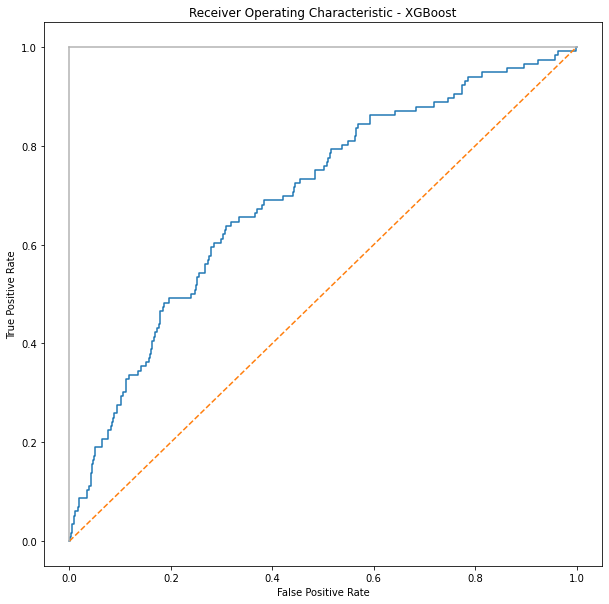

In [71]:
plt.subplots(1, figsize=(10, 10))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
results = confusion_matrix(y_test,y_pred)
print(results)

[[1601    4]
 [ 114    2]]
